In [1]:
from statistics import mean
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

%matplotlib inline

In [2]:
def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)

    return m, b


def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]

    squared_error_regr = sum((ys_line - ys_orig) * (ys_line - ys_orig))
    squared_error_y_mean = sum((y_mean_line - ys_orig) * (y_mean_line - ys_orig))

    print(squared_error_regr)
    print(squared_error_y_mean)

    r_squared = 1 - (squared_error_regr/squared_error_y_mean)

    return r_squared

In [4]:
def create_dataset(hm, variance, step=2, correlation =False):
    val =1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        if correlation and correlation == 'neg':
            val -= step
    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

xs, ys = create_dataset(40,40,2,correlation='pos')
xs,ys

(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.]),
 array([ -29.,    5.,  -33.,   29.,   31.,   44.,    2.,   31.,  -12.,
          18.,  -13.,   -8.,   45.,   42.,   59.,   57.,    5.,   41.,
          38.,   68.,   64.,   16.,   65.,   61.,   55.,   65.,   54.,
          81.,   36.,   33.,   25.,   32.,   28.,   64.,   86.,   52.,
          57.,   74.,  107.,   52.]))

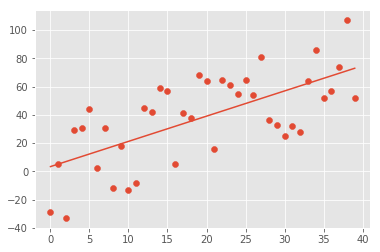

In [5]:
m,b = best_fit_slope_and_intercept(xs, ys)
plt.scatter(xs,ys)
plt.plot(xs, xs*m + b)
plt.show()

In [7]:
coefficient_of_determination(ys, xs*m + b)

21277.3055347
38275.775


0.44410516744052364